# Pymaceuticals Inc.
---

### Analysis

- The code in this jupyter notebook has the code necessary to perform these general analyses:
    - Prepare the data.
    - Generate summary statistics.
    - Create bar charts and pie charts.
    - Calculate quartiles, find outliers, and create a box plot.
    - Create a line plot and a scatter plot.
    - Calculate correlation and regression.
- The following are 3 observations that can be made from the data:
    - The mice groups treated with the drug regimens Capomulin and Ramicane had the highest number of mice compared to the other drug  regimens (bar charts), but there is overall a higher percentage of male mice compared to female mice (pie harts).
    - The final volume tumor (mm3) is lower in the group of mice treated with Capomulin and Ramicane compared to the other drug regimenrs included, as shown with the boxplots.
    - Finally, the average tumor volume (mm3) is significantly correlated with weight (g).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress # Added additional dependency for the linear regression analysis performed below

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer") # Merge datasets

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates # Show duplicate mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = combined_data[combined_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop([587, 589, 591, 593, 595]) # Remove duplicates by specifying row index from above
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
### Additional check to see if duplicate mouse data points were removed ###
duplicate_mouse_removed = clean_data[clean_data["Mouse ID"] == "g989"]
duplicate_mouse_removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
590,g989,Propriva,Female,21,26,10,51.745156,0
592,g989,Propriva,Female,21,26,15,51.325852,1
594,g989,Propriva,Female,21,26,20,55.326122,1
596,g989,Propriva,Female,21,26,25,56.045564,1
597,g989,Propriva,Female,21,26,30,59.082294,1
598,g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data["Mouse ID"])
num_mice

## Note: Number of unique mice will be the same as before removing duplicates. The number of mice in original dataset was 1893, so 5 duplicate rows were removed.
#num_mice_original = len(combined_data["Mouse ID"])
#num_mice_original

1888

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor_size = pd.DataFrame(round(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(), 2))
median_tumor_size = pd.DataFrame(round(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(), 2))
variance_tumor_size = pd.DataFrame(round(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var(), 2))
std_tumor_size = pd.DataFrame(round(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std(), 2))
sem_tumor_size = pd.DataFrame(round(clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem(), 2))

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame()
summary_statistics["Mean Tumor Volume (mm3)"] = mean_tumor_size["Tumor Volume (mm3)"]
summary_statistics["Median Tumor Volume (mm3)"] = median_tumor_size["Tumor Volume (mm3)"]
summary_statistics["Variance Tumor Volume (mm3)"] = variance_tumor_size["Tumor Volume (mm3)"]
summary_statistics["Standard Deviation Tumor Volume (mm3)"] = std_tumor_size["Tumor Volume (mm3)"]
summary_statistics["Standard Error Tumor Volume (mm3)"] = sem_tumor_size["Tumor Volume (mm3)"]

summary_statistics # Show resulting data frame

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregated = round(clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var","std","sem"]}),2)
summary_statistics_aggregated # Show resulting data frame using the method above

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

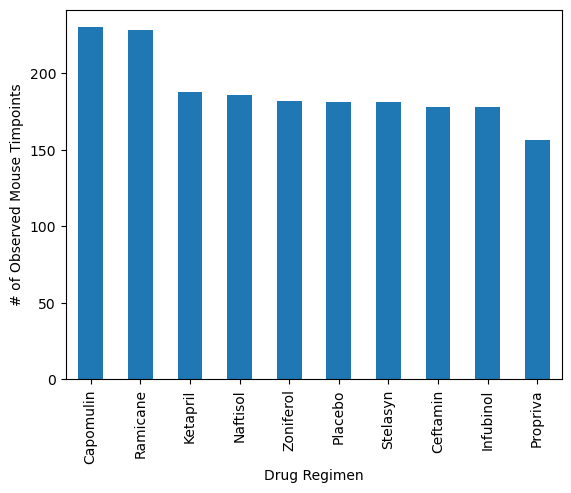

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mice = clean_data.groupby(["Drug Regimen"]).count() # Count number of mice
sorted = count_mice.sort_values(by = ["Mouse ID"], ascending = False) # Sort in descending order by the count of mice in "Mouse ID" column

sorted.apply(["Mouse ID"], axis = 1).plot(kind = "bar", legend = False) # Generate barplot

plt.xlabel("Drug Regimen") # Add x axis label
plt.ylabel("# of Observed Mouse Timpoints") # Add y axis label

plt.show() # Show plot

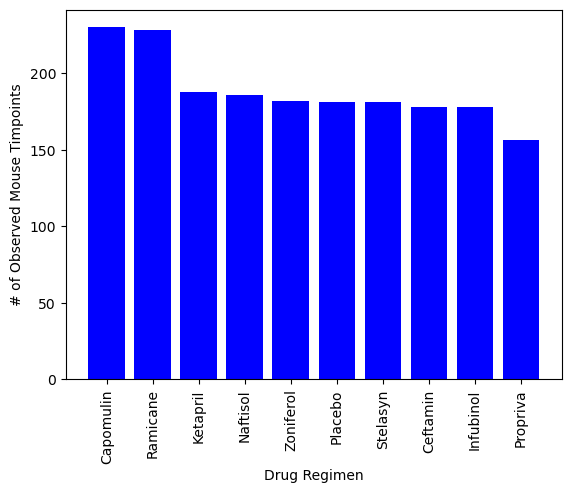

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_mice = clean_data.groupby("Drug Regimen").count() # Count number of mice
sorted = count_mice.sort_values(by = ["Mouse ID"], ascending = False) # Sort in descending order by the count of mice in "Mouse ID" column

x_axis = sorted.index.values # Set x axis 
tick_locations = [value for value in x_axis] # Set tick locations

plt.bar(x_axis, sorted["Mouse ID"], color = 'b', align = "center") # Generate bar plot

plt.xticks(tick_locations, sorted.index.values, rotation = "vertical") # Specify where to write x labels
plt.xlabel("Drug Regimen") # Add x axis label
plt.ylabel("# of Observed Mouse Timpoints") # Add y axis 

plt.show() # Show plot

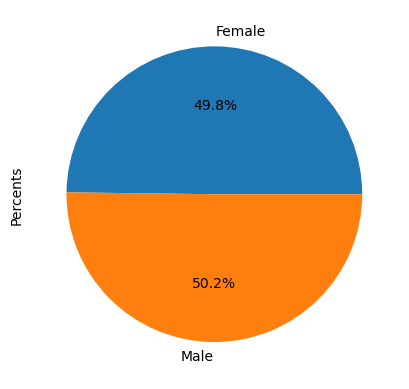

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_females = clean_data[clean_data["Sex"] == "Female"] # Subset females
unique_females2 = unique_females["Mouse ID"].nunique() # Find unique females from the subset data
# unique_females = 124

unique_males = clean_data[clean_data["Sex"] == "Male"] # Subset males
unique_males2 = unique_males["Mouse ID"].nunique() # Find unique males from subset data
# unique_males = 125

total_unique_females_males = unique_females2 + unique_males2 # Get total of unique females and males to calculate percentages of total unique mouse below

percent_females = (unique_females2/total_unique_females_males) * 100 # Get percentage of unique females
percent_males = (unique_males2/total_unique_females_males) * 100 # Get percentage of unique males
# percent_females = 49.79919678714859
# percent_males = 50.20080321285141

percents = pd.DataFrame({"Percents": [49.80, 50.20], # Create data frame with percentages calculated above and add respective sex
                        "Sex": ["Female", "Male"]})

# Make the pie chart
percents.plot(kind = "pie", y = "Percents", labels = percents["Sex"], autopct = "%1.1f%%", legend = False)

plt.show() # Show plot

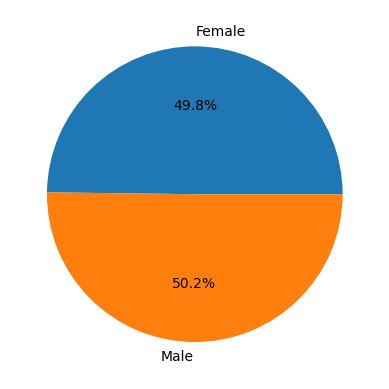

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_females = clean_data[clean_data["Sex"] == "Female"] # Subset females
unique_females2 = unique_females["Mouse ID"].nunique() # Find unique females from subset data
# unique_females = 124

unique_males = clean_data[clean_data["Sex"] == "Male"] # Subset males
unique_males2 = unique_males["Mouse ID"].nunique() # Find unique males from subset data
# unique_males = 125

total_unique_females_males = unique_females2 + unique_males2 # Get the total of unique females and males to calculate percentages of total unique mouse below

percent_females = (unique_females2/total_unique_females_males) * 100 # Get percentage of unique females
percent_males = (unique_males2/total_unique_females_males) * 100 # Get percentage of unique males
# percent_females = 49.79919678714859
# percent_males = 50.20080321285141

percents = [49.80, 50.20] # Set percents calculated above to be used in the pie chart

labels = ["Female", "Male"] # Set labels
        
# Make the pie chart
plt.pie(percents, labels = labels, autopct = "%1.1f%%")

plt.show() # Show plot

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_data.groupby(["Mouse ID"])["Timepoint"].max()) # Group data by mouse ID and calculate maximum (greatest) timepoint
max_timepoint2 = max_timepoint.reset_index() # Reset index
max_timepoint2 = max_timepoint2.rename(columns = {"Timepoint": "Max Timepoint"}) # Rename "Timepoint" column before merging with original dataframe to differentiate it from original "Timepoint" column

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_data, max_timepoint2, on = "Mouse ID")
merged_data.head() # Preview resulting dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,a203,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,20,55.173336,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    drug_df = merged_data.loc[merged_data["Drug Regimen"] == drug]

# add subset
    final_tumor_volume = drug_df.loc[drug_df["Timepoint"] == drug_df["Max Timepoint"]]["Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i, drug in enumerate(treatment_list):
    quartiles = tumor_vol_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_data[i][(tumor_vol_data[i] < lower_bound) | (tumor_vol_data[i] > upper_bound)]
    
    print(f"{drug} Potential Outliers: {outliers}") # Print results

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 275    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


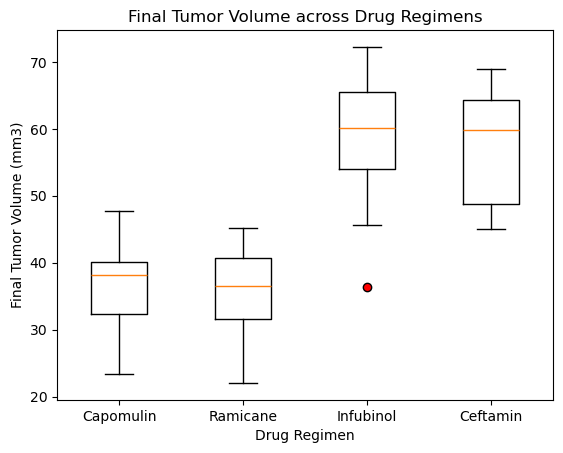

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels = treatment_list, showfliers = True, flierprops = dict(marker = "o", markerfacecolor = "red"))
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Final Tumor Volume across Drug Regimens")

plt.show()

## Line and Scatter Plots

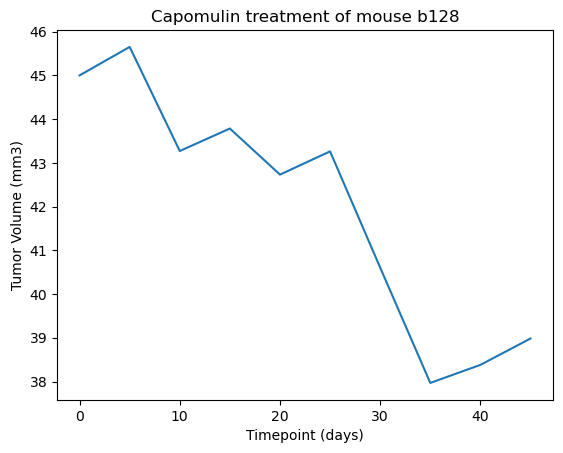

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "b128")] # Subset data for Capomulin and a single mouse
capomulin_mouse.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", legend = False, xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", title = "Capomulin treatment of mouse b128")

plt.show()

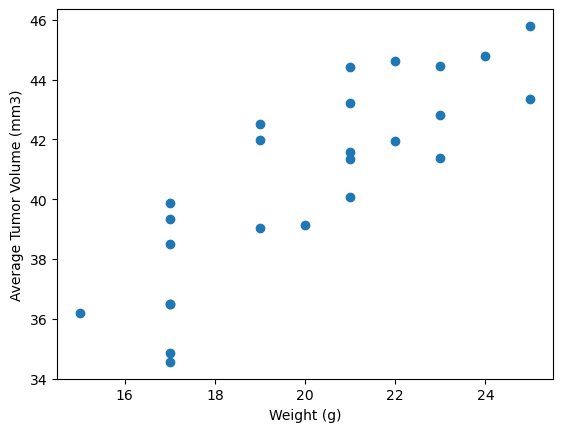

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_data[(clean_data["Drug Regimen"] == "Capomulin")] # Subset Capomulin data
average_tumor_size = pd.DataFrame(capomulin.groupby(["Weight (g)","Mouse ID"], as_index = False)["Tumor Volume (mm3)"].mean()) # Get average tumor size from dataset subset above by grouping by weight and mouse ID. Add as_index = False so that "Weight (g)" is not converted into the dataframe rows

plt.scatter(average_tumor_size["Weight (g)"], average_tumor_size["Tumor Volume (mm3)"]) # Create scatter plot
plt.xlabel("Weight (g)") # Add x axis label
plt.ylabel("Average Tumor Volume (mm3)") # Add y axis label

plt.show()

## Correlation and Regression

The Pearson correlation coefficient between weight (g) and average tumor size (mm3) is 0.84, which is a very strong correlation.
The r-squared value is 0.7088568047708721.


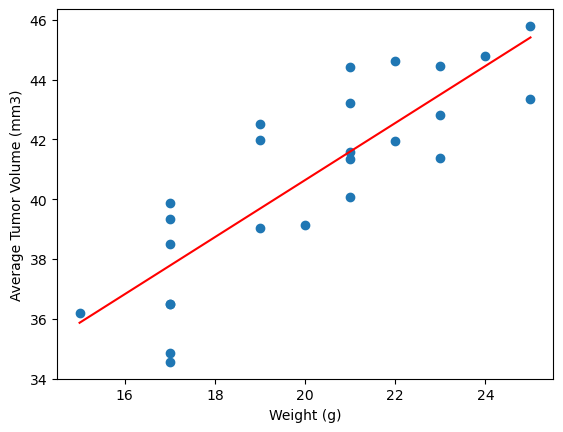

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation
mouse_weight = average_tumor_size["Weight (g)"] # Set variable for mouse weight
tumor_size = average_tumor_size["Tumor Volume (mm3)"] # Set variable for tumor size
correlation = st.pearsonr(mouse_weight, tumor_size) # Perform Pearson correlation
print(f"The Pearson correlation coefficient between weight (g) and average tumor size (mm3) is {round(correlation[0],2)}, which is a very strong correlation.")

# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_size) # Perform linear regression
regression_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, tumor_size) # Create scatter plot
plt.plot(mouse_weight, regression_values, "r-") # Add regression to plot based on equation of line above
plt.xlabel("Weight (g)") # Add x axis label
plt.ylabel("Average Tumor Volume (mm3)") # Add y axis label

print(f"The r-squared value is {rvalue**2}.")

plt.show()

In [ ]:
### END ###